In [16]:
import pandas
import matplotlib.pyplot as plt

In [23]:
def intify(_l):
    for i in range(len(_l)):
        try:
            _l[i] = int(_l[i])
        except:
            pass
    return _l

In [97]:
colnames = [
    "n_wifi_off",
    "connected_mesh",
    "best_case_connected_mesh",
    "worst_case_connected_mesh",
]
data = pandas.read_csv("Mesh Robustness - No-mesh (5X4X7).csv", names=colnames)

NO_MESH_DATA = {
    "n_wifi_off": intify(data.n_wifi_off.tolist()[1:]),
    "connected_mesh": intify(data.connected_mesh.tolist()[1:]),
    "best_case_connected_mesh": intify(data.best_case_connected_mesh.tolist()[1:]),
    "worst_case_connected_mesh": intify(data.worst_case_connected_mesh.tolist()[1:]),
}

data = pandas.read_csv(
    "Mesh Robustness - With Mesh (5 Hops) (5X4X7).csv", names=colnames
)

WITH_MESH_DATA = {
    "n_wifi_off": intify(data.n_wifi_off.tolist()[1:]),
    "connected_mesh": intify(data.connected_mesh.tolist()[1:]),
    "best_case_connected_mesh": intify(data.best_case_connected_mesh.tolist()[1:]),
    "worst_case_connected_mesh": intify(data.worst_case_connected_mesh.tolist()[1:]),
}

for dic in [NO_MESH_DATA, WITH_MESH_DATA]:
    for key in dic:
        mx = max(dic[key])
        for i in range(len(dic[key])):
            dic[key][i] = (dic[key][i]/mx)*100

print(NO_MESH_DATA, "\n\n", WITH_MESH_DATA)

{'n_wifi_off': [0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.00000000000001, 60.0, 65.0, 70.0, 75.0, 80.0, 85.0, 90.0, 95.0, 100.0], 'connected_mesh': [100.0, 95.41284403669725, 91.28440366972477, 86.69724770642202, 82.11009174311926, 77.52293577981652, 72.93577981651376, 68.34862385321101, 63.76146788990825, 58.71559633027523, 53.669724770642205, 48.62385321100918, 43.57798165137615, 38.53211009174312, 33.02752293577982, 27.981651376146786, 22.477064220183486, 16.972477064220186, 11.46788990825688, 5.963302752293578, 0.0], 'best_case_connected_mesh': [100.0, 97.24770642201835, 94.4954128440367, 91.74311926605505, 88.9908256880734, 84.86238532110092, 80.73394495412845, 76.14678899082568, 71.55963302752293, 66.5137614678899, 61.46788990825688, 56.42201834862385, 51.37614678899083, 46.330275229357795, 41.284403669724774, 35.321100917431195, 28.899082568807337, 22.477064220183486, 15.137614678899084, 7.79816513761468, 0.0], 'worst_case_connected_mesh': [100.0, 94.495

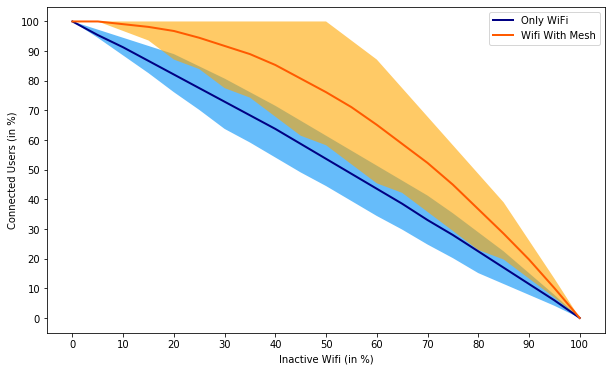

In [100]:
plt.figure(figsize=(10, 6))

x = NO_MESH_DATA["n_wifi_off"]  # or WITH_MESH_DATA['n_wifi_off']

plt.plot(x, NO_MESH_DATA["connected_mesh"], label="Only WiFi", c="#000083", linewidth=2)

plt.plot(
    x,
    WITH_MESH_DATA["connected_mesh"],
    label="Wifi With Mesh",
    c="#ff5a00",
    linewidth=2,
)

plt.fill_between(
    x,
    NO_MESH_DATA["best_case_connected_mesh"],
    NO_MESH_DATA["worst_case_connected_mesh"],
    fc="#0090f8",
    alpha = 0.6
)

plt.fill_between(
    x,
    WITH_MESH_DATA["best_case_connected_mesh"],
    WITH_MESH_DATA["worst_case_connected_mesh"],
    fc="#ffa700",
    alpha = 0.6
)

# plt.plot(
#     x,
#     WITH_MESH_DATA["best_case_connected_mesh"],
#     label="Wifi With Mesh",
#     c="#0090f8",
#     linewidth=0.5,
#     linestyle=':'
# )

# plt.plot(x_vals, round_trip_times, label="Avg. Round Trip Time Values", c="green")
plt.ylabel("Connected Users (in %)")
plt.xlabel("Inactive Wifi (in %)")
plt.xticks([i for i in range(0,101,10)])
plt.yticks([i for i in range(0,101,10)])
plt.legend()
# # save figure
plt.savefig('./sim.png')
plt.show()